In [1]:

import litho1pt0 as litho
from pprint import pprint
import numpy as np

%matplotlib inline

In [2]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

global_extent     = [-180.0, 180.0, -89, 89]

projection1 = ccrs.Orthographic(central_longitude=140.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()
projection3 = ccrs.Robinson()

base_projection = ccrs.PlateCarree()

In [3]:
## make a global raster of some quantity

lonv, latv = np.meshgrid(  np.linspace(-180.0,180.0,720), np.linspace(-89.999,89.999,360), indexing='xy')
l1 = litho.layer_depth(lat=latv, lon=lonv, layerID="LID-BOTTOM")

In [4]:
lab_depth = 0.001 * l1

In [5]:
grad = np.gradient(lab_depth)

In [6]:
lap = grad[0]**2 + grad[1]**2

In [7]:
lap = 1. - (lap / lap.max())

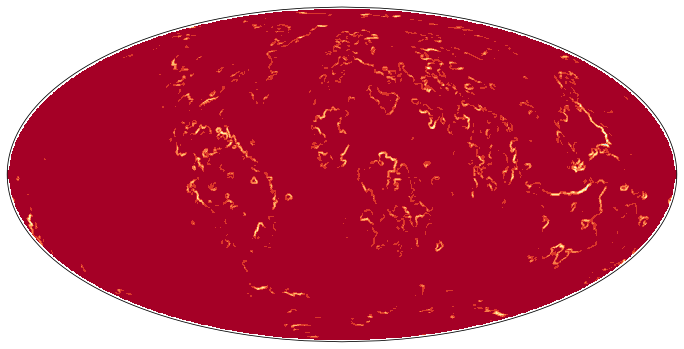

In [8]:
## Relative thickness of crust

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=projection2)
ax.set_global()

colormap = plt.cm.get_cmap('RdYlBu_r', 10)

"""
Possible values are: 

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, 
Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2,
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r,
RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10,
Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r,
YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, 
coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r,
gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r,
gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean,
ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r,
summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r
"""

m = ax.imshow(lap, origin='lower', 
          transform=base_projection,
          extent=global_extent, 
          zorder=0,
          cmap=colormap, 
          interpolation="gaussian")

In [9]:
import numpy as np

lons = np.linspace(-180, 180, 180)
lats = np.linspace(-90, 90, 90)

In [10]:
lons

array([-180.        , -177.98882682, -175.97765363, -173.96648045,
       -171.95530726, -169.94413408, -167.93296089, -165.92178771,
       -163.91061453, -161.89944134, -159.88826816, -157.87709497,
       -155.86592179, -153.8547486 , -151.84357542, -149.83240223,
       -147.82122905, -145.81005587, -143.79888268, -141.7877095 ,
       -139.77653631, -137.76536313, -135.75418994, -133.74301676,
       -131.73184358, -129.72067039, -127.70949721, -125.69832402,
       -123.68715084, -121.67597765, -119.66480447, -117.65363128,
       -115.6424581 , -113.63128492, -111.62011173, -109.60893855,
       -107.59776536, -105.58659218, -103.57541899, -101.56424581,
        -99.55307263,  -97.54189944,  -95.53072626,  -93.51955307,
        -91.50837989,  -89.4972067 ,  -87.48603352,  -85.47486034,
        -83.46368715,  -81.45251397,  -79.44134078,  -77.4301676 ,
        -75.41899441,  -73.40782123,  -71.39664804,  -69.38547486,
        -67.37430168,  -65.36312849,  -63.35195531,  -61.34078

In [11]:
lons, lats = np.meshgrid(lons, lats)

In [12]:
coords = np.zeros((90 * 180, 2))
coords[:, 0] = lons.flatten()
coords[:, 1] = lats.flatten()

In [13]:
lat = coords[:, 1]
lon = coords[:, 0]

x = np.sin(lat) * np.cos(lon)
y = np.sin(lat) * np.sin(lon)
z = np.cos(lat)

In [14]:
lat

array([-90., -90., -90., ...,  90.,  90.,  90.])

In [15]:
import gmsh

In [16]:
gmsh.initialize()

In [17]:
gmsh.model.add("Theme")

In [18]:
for point in coords:
    lon, lat = point
    x = np.sin(lat) * np.cos(lon)
    y = np.sin(lat) * np.sin(lon)
    z = np.cos(lat)
    gmsh.model.geo.add_point(x, y, z)

In [19]:
gmsh.model.geo.synchronize()

In [20]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.10.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20220501
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.6.1
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------
